## Business Understanding

SyriaTel, a leading telecommunications provider in Syria, is experiencing an increase in customer churn. Understanding the factors leading to service discontinuation is crucial for enhancing customer retention strategies. This analysis focuses on identifying predictive features that might indicate potential churn.

## Problem Statement

Classify the key indicators or features that correlate with customer churn in order to formulate proactive retention strategies.

## Objectives

1.   Engineer a binary
2.   Train a classifier
3.   Optimize model performance using feature engineering and tuning.



## Data Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px


warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/bigml_59c28831336c6604c800002a.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/bigml_59c28831336c6604c800002a.csv'

In [127]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning

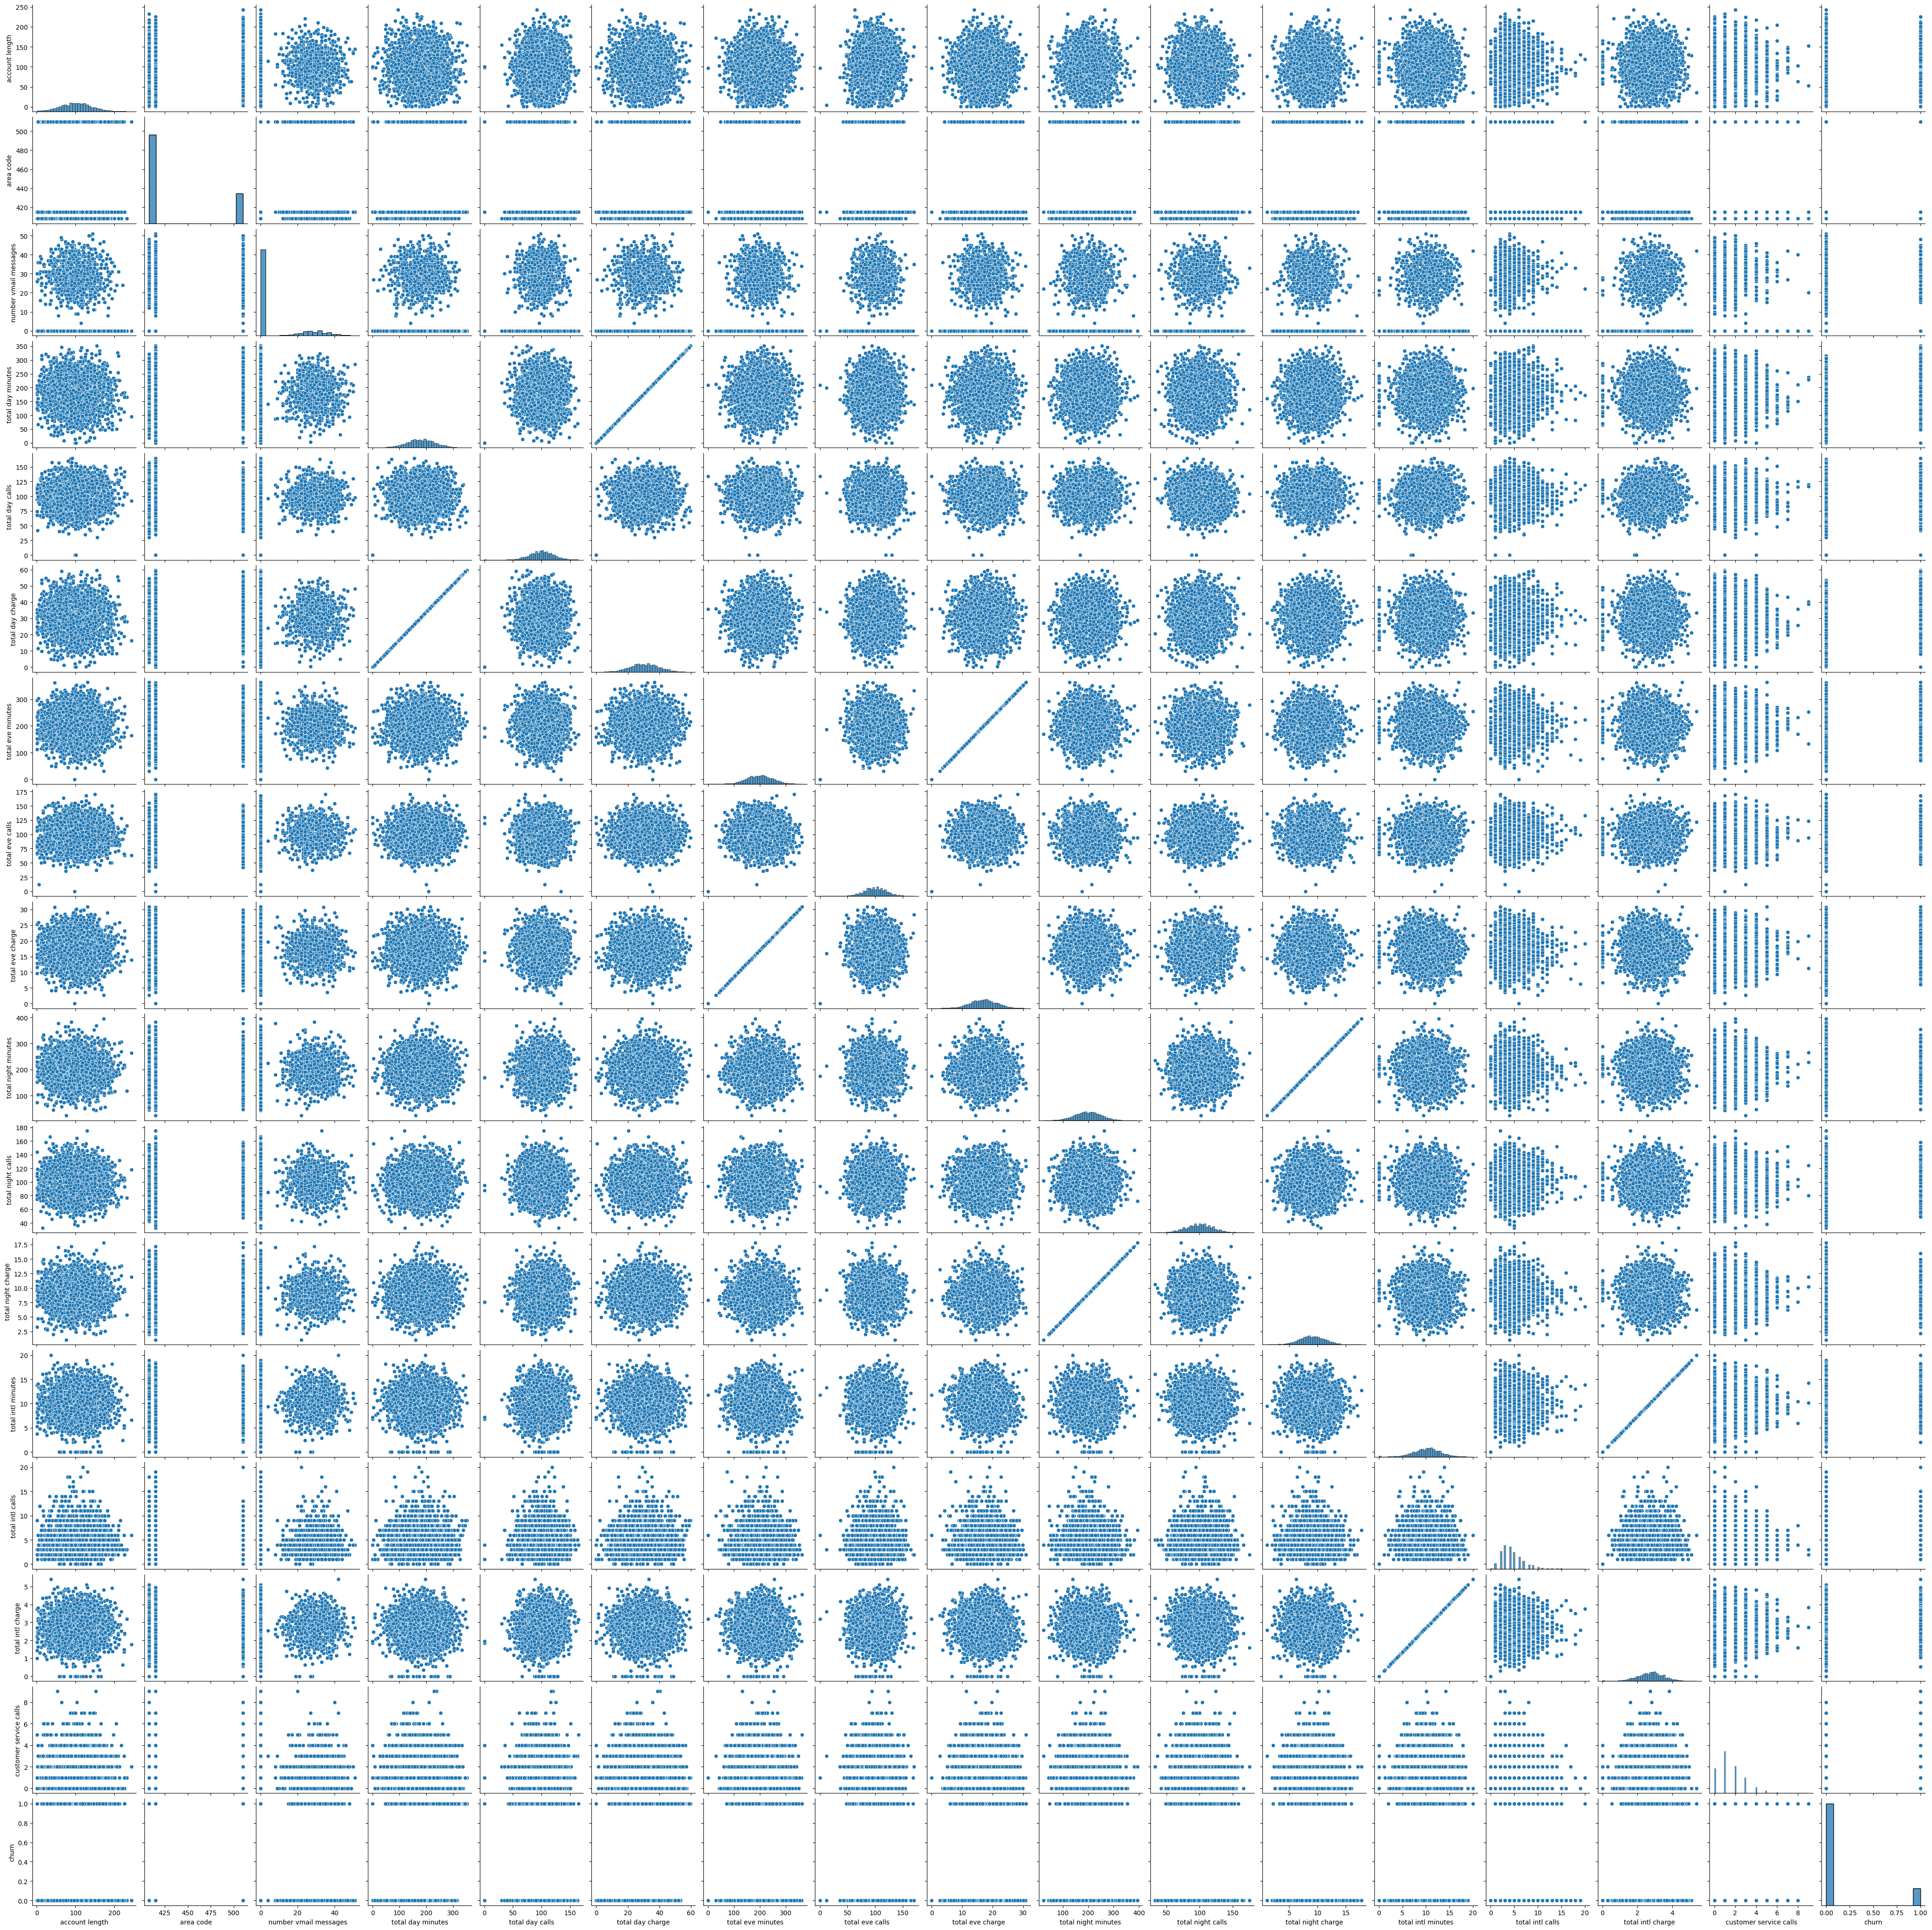

In [129]:
sns.pairplot(df)

### Handling missings values

In [22]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Handling Duplicated values

In [12]:
# Check for duplicated row
df.duplicated().sum()

0

### Handling NAs

In [20]:
# CHeck NAs
df.isna().mean()*100

state                     0.0
account length            0.0
area code                 0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

### Other cleaning steps

<Axes: >

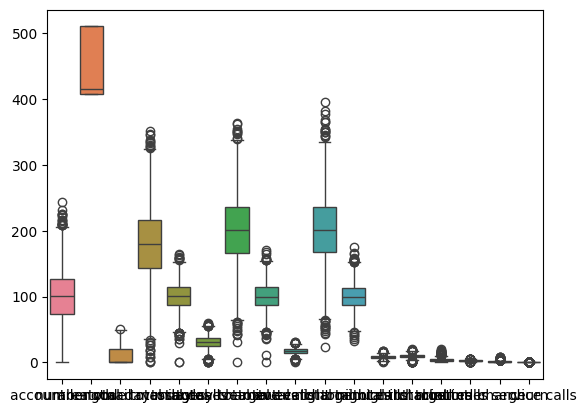

In [23]:
  # OUtliers

  # Feature engineering

sns.boxplot(df)

## EDA

In [26]:
# Check the number of unique values to determine feature types.

df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

Feature Types

Continuous features are numeric values with an infinite number of possible values
Categorical features are values that have a finite number of categories/groups

In [27]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

Analysis on Churn feature

Churn will be used as the dependent variable in this analysis.
Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an existing account.

churn
False    2850
True      483
Name: count, dtype: int64


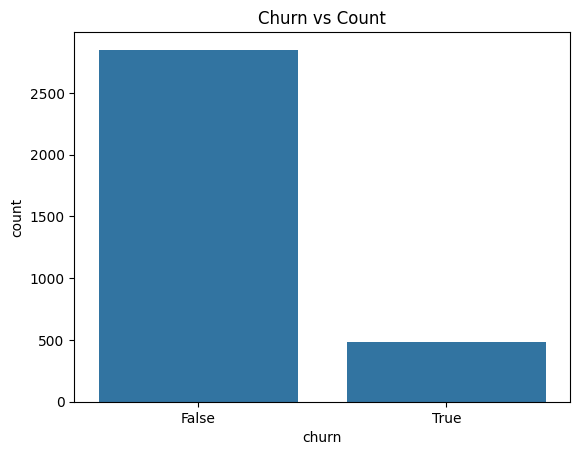

In [31]:
# Countplot of churn feature

sns.countplot(data=df, x='churn')
plt.title('Churn vs Count')
print(df.churn.value_counts())


- Of the 3,333 customers in the dataset, 483 have terminated
their contract with SyriaTel. That is 14.5% of customers lost.
- The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

Analysis on 'area code'

In [35]:
# Pie chart of area code feature

area = df['area code'].value_counts()
transuction = area.index
quantity = area.values

# draw pie circule with plotly
figure = px.pie(df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

- Half of the customers have the area code 415.
- One fourth of customers have the area code 510
- Another fourth have the area code 408.

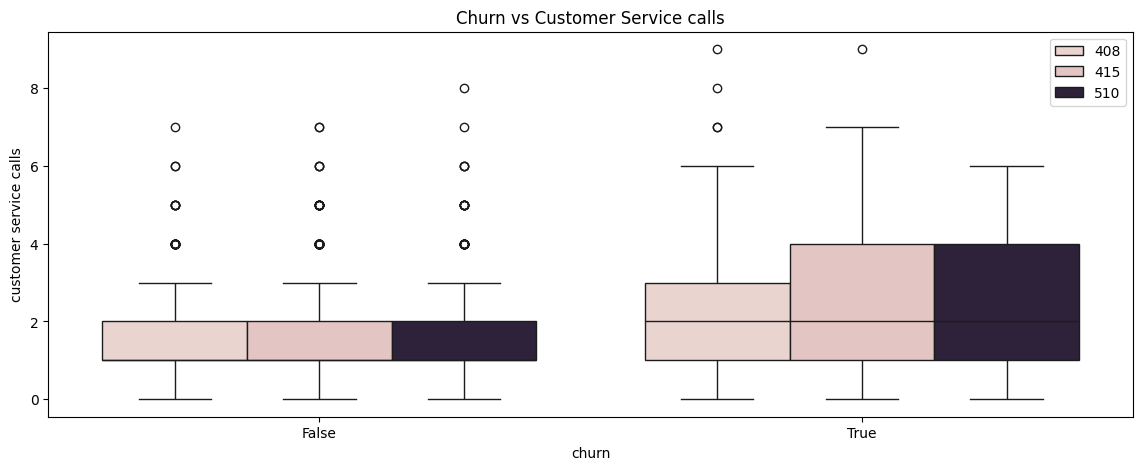

In [37]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df, x='churn', y='customer service calls', hue='area code')
plt.title('Churn vs Customer Service calls')
plt.legend(loc='upper right')

- There are outliers, in all area codes, amongst the customers who have not terminated their accounts.
- Of the customers who have terminated their account, they more likely have a 415 or a 510 area code

Pairplots for Numeric Features (Hue as "Churn")¶


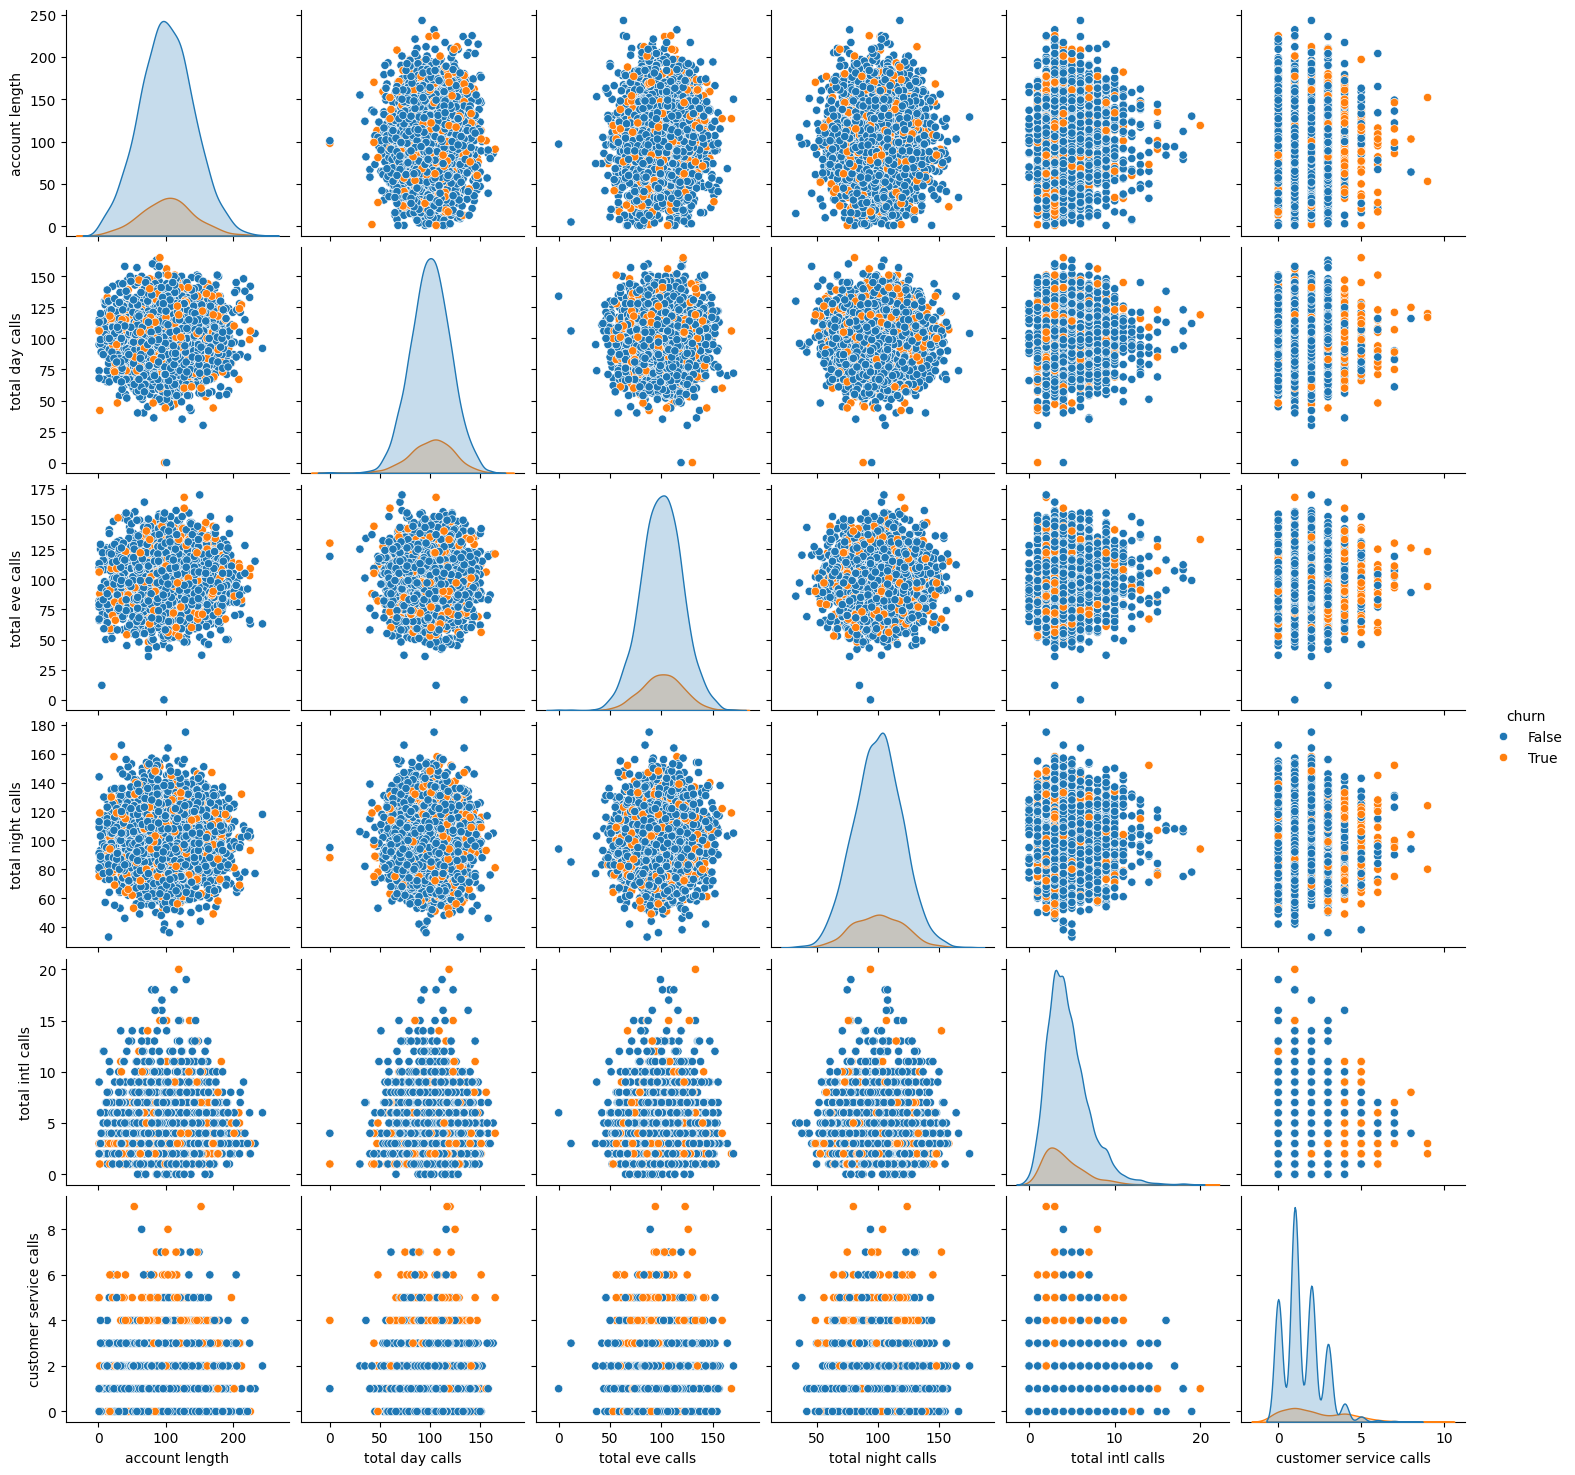

In [38]:
data_temp = df[["account length","total day calls","total eve calls","total night calls", "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show()

- There seems to be a evident relationship between customer service calls and true churn values.
- After 4 calls, customers are a lot more likely to discontinue their service.

Correlation Heatmap for Numeric Features¶


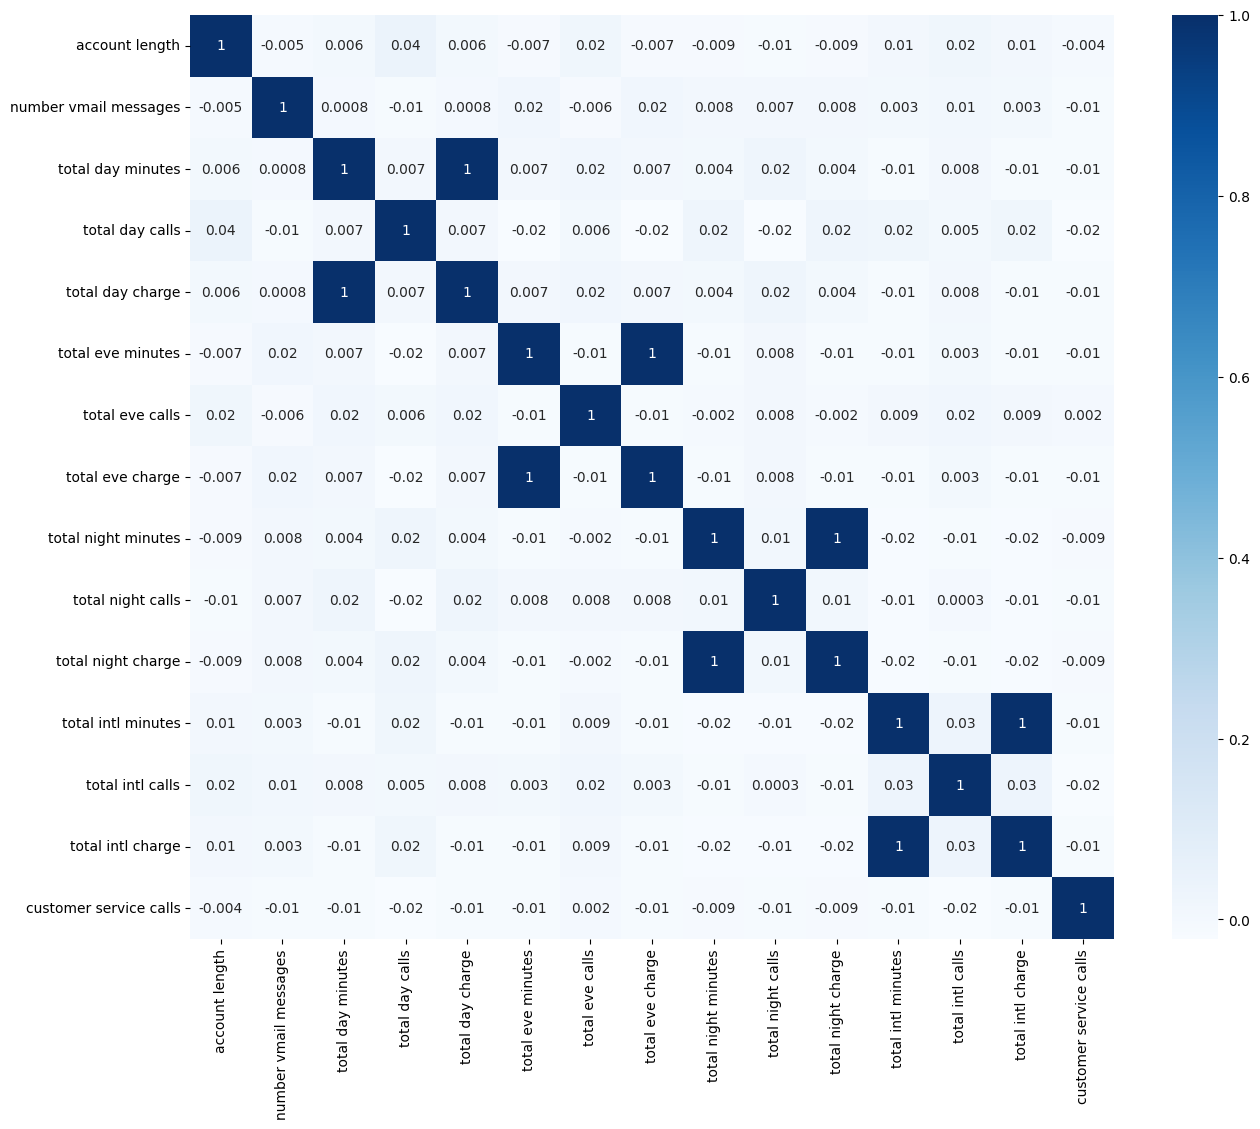

In [39]:
corr_mat = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Most of the features are not correlated however some do share a perfect correlation.
- Total day charge and total day minutes features are fully positively correlated.
- Total eve charge and total eve minutes features are fully positively correlated.
- Total night charge and total night minutes features are fully positively correlated.
- Total int charge and total int minutes features are fully positively correlated.

It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.
The perfect correlation of 1 indicates the presence of perfect multicollinearity. It does not have the same impact on nonlinear models as it does on linear models. Some nonlinear models are impacted by perfect multicollinearity whereas others are not.

Categorical Feature Analysis

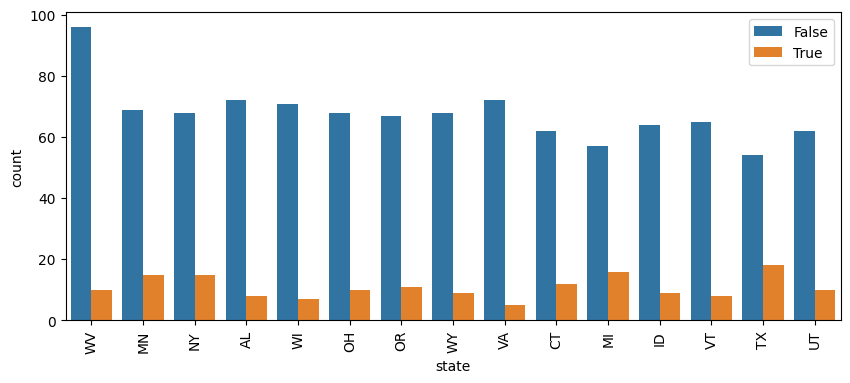

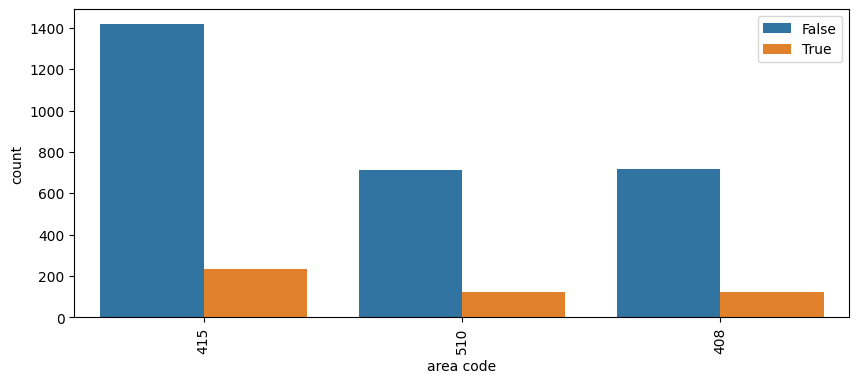

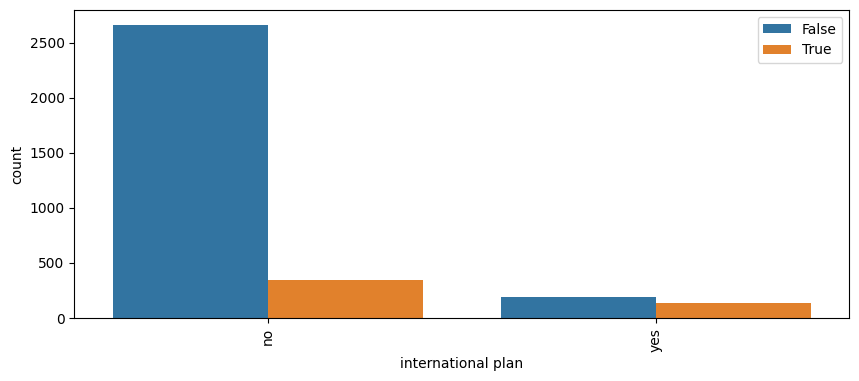

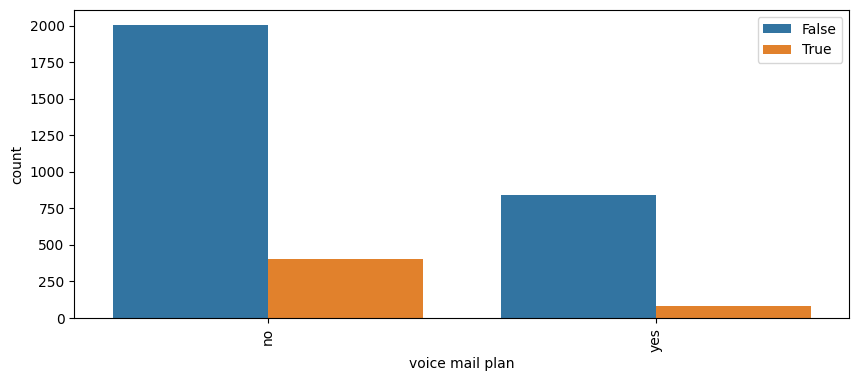

In [40]:
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

Outlier Detection and Treatment

- Dropping outliers past 3 standard deviations.

In [42]:
from scipy import stats

print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)

drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  3169


Dropping Highly-Correlated Features
- Dropping features that have a correlation of 0.9 or above.

In [61]:
print("The original dataframe has {} columns.".format(df.shape[1]))

# Identify highly correlated features
corr_matrix = df[numeric_cols].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Create a new DataFrame without the highly correlated features
reduced_df = df.drop(to_drop, axis=1)
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))


The original dataframe has 16 columns.
The reduced dataframe has 16 columns.


Transforming "Churn" Feature's Rows into 0s and 1s¶


In [64]:
reduced_df['churn'].value_counts()


churn
False    2727
True      442
Name: count, dtype: int64

In [65]:
reduced_df['churn'] = reduced_df['churn'].map({True: 1, False: 0}).astype('int')
reduced_df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0              197.4               99                244.7                 91   
1              195.5              103                254.4                103   
2              121.2              110                162.6                104   
3               61.9               88                196.9                 89   
4              148.3              122                186.9                121   

   total intl minutes  total intl calls  customer service calls  churn  
0                10.0                 3                       1      0  
1                13.7                 3                       1      0  
2                12.2                 5                       0      0  
3                 6.6                 7                       2      0  
4                10.1                 3                       3      0

## Preprocessing

### Encoding

One-Hot Encoding
-
Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [66]:
dummy_df_state = pd.get_dummies(reduced_df["state"],dtype=np.int64,prefix="state_is")
dummy_df_area_code = pd.get_dummies(reduced_df["area code"],dtype=np.int64,prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(reduced_df["international plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_df_voice_mail_plan = pd.get_dummies(reduced_df["voice mail plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


reduced_df = pd.concat([reduced_df,dummy_df_state,dummy_df_area_code,dummy_df_international_plan,dummy_df_voice_mail_plan],axis=1)
reduced_df = reduced_df.loc[:,~reduced_df.columns.duplicated()]
reduced_df = reduced_df.drop(['state','area code','international plan','voice mail plan'],axis=1)

reduced_df.head()

account length  number vmail messages  total day minutes  total day calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0              197.4               99                244.7                 91   
1              195.5              103                254.4                103   
2              121.2              110                162.6                104   
3               61.9               88                196.9                 89   
4              148.3              122                186.9                121   

   total intl minutes  total intl calls  ...  state_is_VT  state_is_WA  \
0                10.0                 3  ...            0            0   
1                13.7                 3  ...            0            0   
2                12.2                 5  ...            0            0   
3                 6.6                 7  ...            0            0   
4                10.1                 3  ...            0            0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0            0            0            0                 0                 1   
1            0            0            0                 0                 1   
2            0            0            0                 0                 1   
3            0            0            0                 1                 0   
4            0            0            0                 0                 1   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0                 0                          0                       1  
1                 0                          0                       1  
2                 0                          0                       0  
3                 0                          1                       0  
4                 0                          1                       0  

[5 rows x 68 columns]

### Scaling

Scaling Numerical Features
- Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
- In our example, Min-Max Normalization method is applied. MinMaxScaler is used to reduce the effects of outliers in the dataset. By applying the following method, standard deviation issues will be solved.
- MinMaxScaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.

In [68]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(reduced_df[columns].values.reshape(-1,1))

for i in reduced_df.select_dtypes(include=[np.number]).columns:
    reduced_df[i] = scaling(i)
reduced_df.head()

account length  number vmail messages  total day minutes  total day calls  \
0        0.587963               0.510204           0.773921         0.576271   
1        0.490741               0.530612           0.450281         0.686441   
2        0.629630               0.000000           0.706066         0.610169   
3        0.384259               0.000000           0.881176         0.245763   
4        0.342593               0.000000           0.466229         0.601695   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0           0.490079         0.487179             0.643519           0.422414   
1           0.483796         0.521368             0.675595           0.525862   
2           0.238095         0.581197             0.372024           0.534483   
3           0.041997         0.393162             0.485450           0.405172   
4           0.327712         0.683761             0.452381           0.681034   

   total intl minutes  total intl calls  ...  state_is_VT  state_is_WA  \
0            0.487805               0.2  ...          0.0          0.0   
1            0.713415               0.2  ...          0.0          0.0   
2            0.621951               0.4  ...          0.0          0.0   
3            0.280488               0.6  ...          0.0          0.0   
4            0.493902               0.2  ...          0.0          0.0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0          0.0          0.0          0.0               0.0               1.0   
1          0.0          0.0          0.0               0.0               1.0   
2          0.0          0.0          0.0               0.0               1.0   
3          0.0          0.0          0.0               1.0               0.0   
4          0.0          0.0          0.0               0.0               1.0   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0               0.0                        0.0                     1.0  
1               0.0                        0.0                     1.0  
2               0.0                        0.0                     0.0  
3               0.0                        1.0                     0.0  
4               0.0                        1.0                     0.0  

[5 rows x 68 columns]

## Classification

### Logistic Regression

Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature.
It is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.
This method will be used to create a baseline mode

In [95]:
# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [96]:
X=reduced_df.drop(['churn'],axis=1)
y=reduced_df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)


In [97]:
sm = SMOTE(k_neighbors=5, random_state=123)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape))
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))


Before OverSampling, the shape of X_train: (2376, 67)
Before OverSampling, the shape of y_train: (2376,)
After OverSampling, the shape of X_train_over: (4126, 67)
After OverSampling, the shape of y_train_over: (4126,)


In [98]:
churn = reduced_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - Before SMOTE')
figure.show()

In [99]:
# Object creation, fitting the data & getting predictions
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over)
y_pred_lr = lr.predict(X_test)

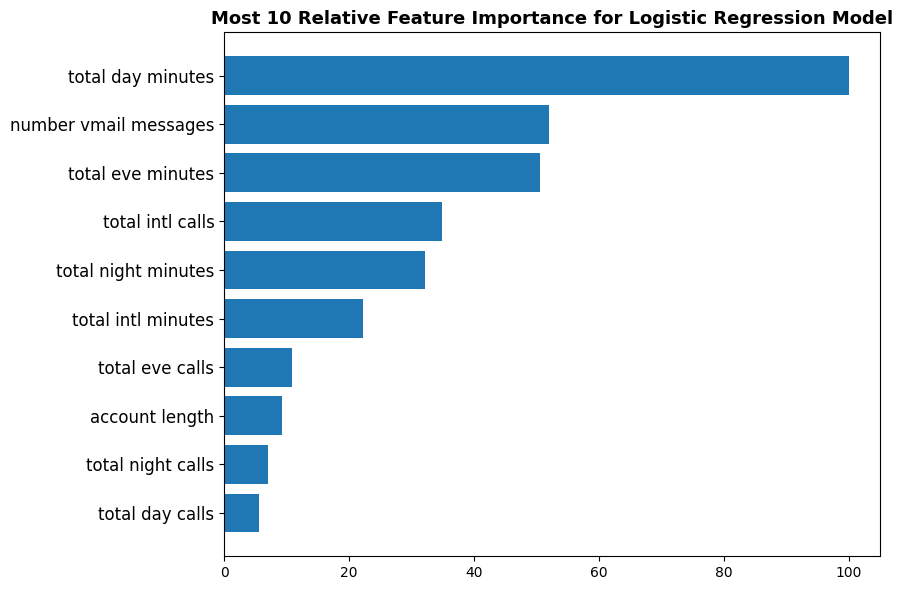

In [100]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS
Accuracy score for testing set:  0.76671
F1 score for testing set:  0.50402
Recall score for testing set:  0.72868
Precision score for testing set:  0.38525


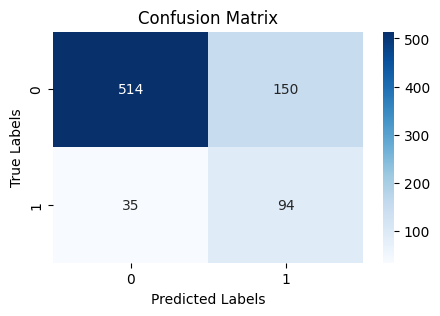

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       664
           1       0.39      0.73      0.50       129

    accuracy                           0.77       793
   macro avg       0.66      0.75      0.68       793
weighted avg       0.85      0.77      0.79       793



In [118]:
print("LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))


- According to the logistic regression classifier model, total day charge, number of voicemail messages and total evening charge are the top three important features.
- Model accuracy is 77%, which isn't bad. F1 score is only 50.% which means the test will only be accurate half the times it is ran.

### Random Forest

- Random forest is an ensemble machine learning algorithm.
- Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [103]:
# Object creation, fitting the data & getting predictions
rf_model_final = RandomForestClassifier()
rf_model_final.fit(X_train_over,y_train_over)
y_pred_rf = rf_model_final.predict(X_test)

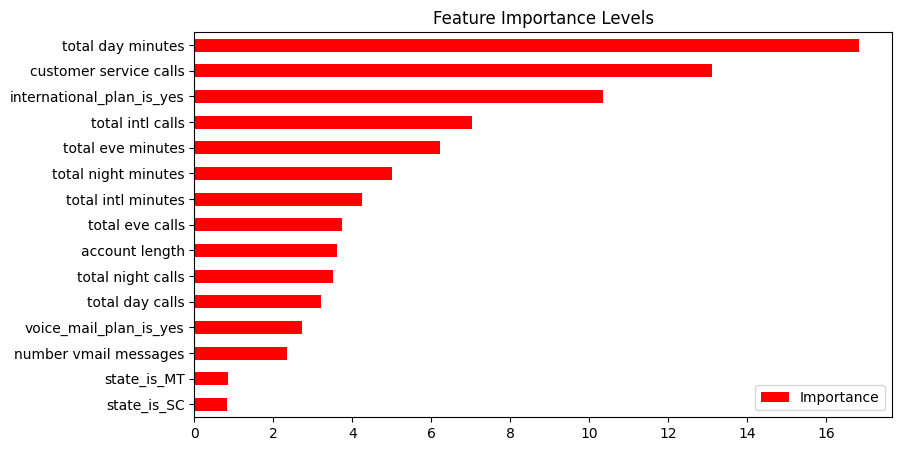

In [104]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

RANDOM FOREST MODEL RESULTS 
Accuracy score for testing set:  0.87642
F1 score for testing set:  0.65972
Recall score for testing set:  0.73643
Precision score for testing set:  0.59748


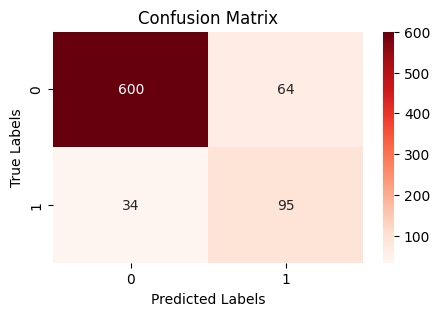

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       664
           1       0.60      0.74      0.66       129

    accuracy                           0.88       793
   macro avg       0.77      0.82      0.79       793
weighted avg       0.89      0.88      0.88       793



In [117]:
print("RANDOM FOREST MODEL RESULTS ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))


- According to the random forest classifier, total day charge, customer service calles and "international plan is yes" features have the highest impact on the model.
- Accuracy and F1 score are much higher for this model, which is good news.

### Decision Tree

- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

- The logic behind the decision tree can be easily understood because it shows a tree-like structure.


In [112]:
# Object creation, fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_over,y_train_over)
y_pred_dt = decision_tree.predict(X_test)

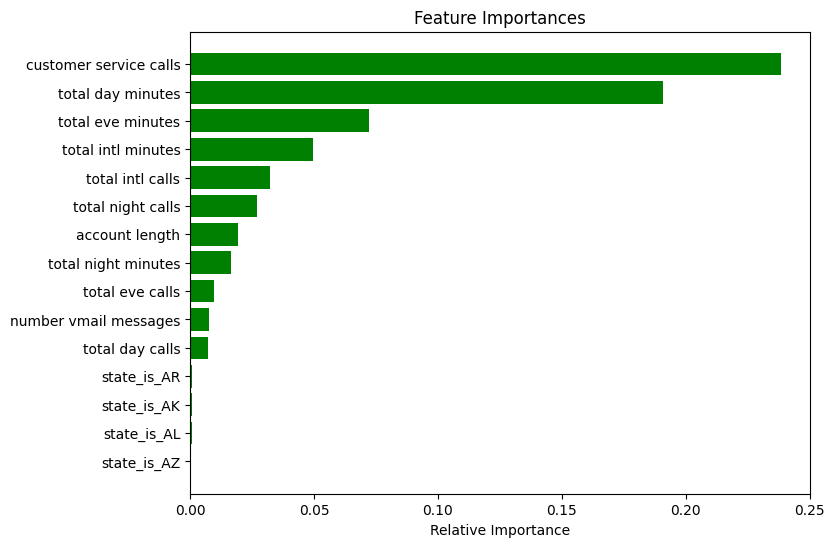

In [113]:
feature_names = list(X_train_over.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

DECISION TREE CLASSIFIER MODEL RESULTS
Accuracy score for testing set:  0.88146
F1 score for testing set:  0.67361
Recall score for testing set:  0.75194
Precision score for testing set:  0.61006


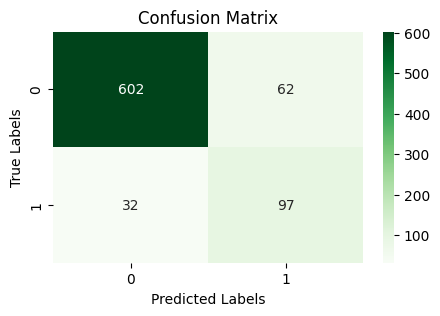

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       664
           1       0.61      0.75      0.67       129

    accuracy                           0.88       793
   macro avg       0.78      0.83      0.80       793
weighted avg       0.89      0.88      0.89       793



In [116]:
print("DECISION TREE CLASSIFIER MODEL RESULTS")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

According to the decision tree classifier, customer service calls total day charge and total evening charge are the three most important for the model.
The accuracy and F1 score for this model is not as great as model 2.

The best model is Random Forest because it had accuracy = 88% & recall of 75%. Better than all the other models

## Hyperparameter tuning

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tuned Random Forest - Accuracy: 0.9255989911727617
Tuned Random Forest - Recall: 0.5426356589147286
Tuned Random Forest - F1-score: 0.7035175879396985
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       664
         1.0       1.00      0.54      0.70       129

    accuracy                           0.93       793
   macro avg       0.96      0.77      0.83       793
weighted avg       0.93      0.93      0.92       793



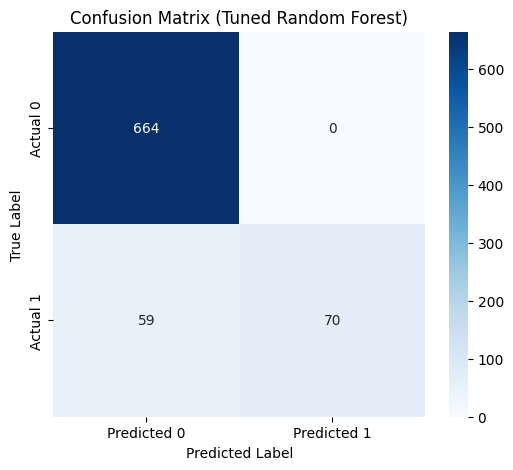

In [124]:
# prompt: tune the decison tree model using randomised or gridsearch cv. and refit the rf_model_tuned and metrics as above also

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV or GridSearchCV
# rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the randomized search to the data
# rf_random.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)


# Get the best estimator from the search
rf_model_tuned = rf_grid.best_estimator_ #or rf_random.best_estimator_

# Make predictions using the tuned model
y_pred = rf_model_tuned.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Tuned Random Forest - Accuracy: {accuracy}")
print(f"Tuned Random Forest - Recall: {recall}")
print(f"Tuned Random Forest - F1-score: {f1}")

print(classification_report(y_test, y_pred))

# Plot confusion matrix for the tuned model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

After parameter tuning the accuracy of the model is 93% and recall 77%.

## Model Evaluation


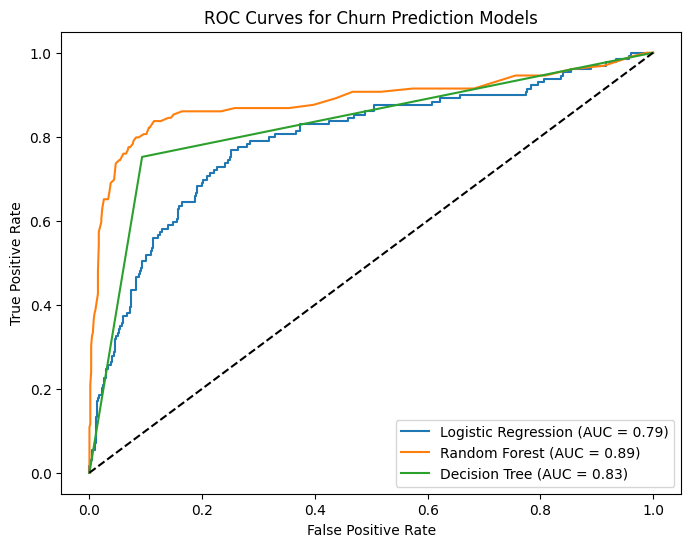

In [123]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your y_test and y_pred_proba for each model
# Example for Logistic Regression:
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Example for Random Forest:
y_pred_proba_rf = rf_model_final.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Example for Decision Tree:
y_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)


plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Churn Prediction Models')
plt.legend(loc='lower right')
plt.show()


Random Forest has the best permance in precting churn.

## Conclusion

- The analysis concludes that the **Random Forest** model, after hyperparameter tuning, provides the best performance for predicting customer churn.
- While Logistic Regression and Decision Tree models offer decent accuracy, the tuned Random Forest achieves a 93% accuracy and 77% recall, outperforming the others in terms of overall predictive power and identifying customers likely to churn.

Key features influencing churn include;

  - Total day charges
  - Customer service calls
  - The presence of an international plan.
   
The initial data imbalance was addressed using SMOTE, and highly correlated features were removed to improve model performance.  The ROC curve analysis further supports the superiority of the tuned Random Forest.
